# Natural Language Processing with Amazon Reviews

Developed for the second project of the Artificial Intelligence course
This notebook handles the preprocessing with bag of words

## Setup and Environment

After installing Python and the necessary packages, run the following code to import them:

In [1]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sb
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import nltk

## Implementation work

### Loading the data

In [4]:
train = pd.read_csv('./data/train.csv', dtype={
    'class_index': int, 'review_title': str, 'review_text': str
}).groupby('class_index').apply(lambda x: x.sample(10000))  # Sample data with all classes uniformly

test = pd.read_csv('./data/test.csv', dtype={
    'class_index': int, 'review_title': str, 'review_text': str
}).groupby('class_index').apply(lambda x: x.sample(2000))  # Sample data with all classes uniformly

train.head()

class_index                       review_title  \
class_index                                                           
1           1249791            1                   Still waiting...   
            1107046            1         Still waiting for the game   
            2268888            1                  Cheaper on iPhone   
            2621618            1  Not what i asked for. Not at all.   
            2717010            1               Not Vista Compatible   

                                                           review_text  
class_index                                                             
1           1249791  I read a lot of non-fiction. Once in a while I...  
            1107046  Not sure if we like this game or not as we ord...  
            2268888  The app store has this product for $25. It has...  
            2621618  The video i ordered " executions 2. was not wh...  
            2717010  I really liked this webcam when I had XP on my...

### Searching for null values

In [3]:
print("Columns with empty review text", len(train.loc[train['review_text'] == ""]))
print("Columns with missing review text", len(train.loc[train['review_text'] == None]))

print("Columns with empty review title", len(train.loc[train['review_title'] == ""]))
print("Columns with missing review title", len(train.loc[train['review_title'] == None]))

print("Columns with empty class index", len(train.loc[train['class_index'] == ""]))
print("Columns with missing class index", len(train.loc[train['class_index'] == None]))

Columns with empty review text 0
Columns with missing review text 0
Columns with empty review title 0
Columns with missing review title 0
Columns with empty class index 0
Columns with missing class index 0


As we can see, the dataset does not contain any empty or missing values

### Studying the data

<AxesSubplot:>

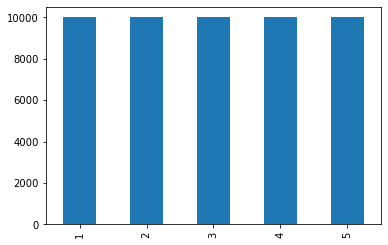

In [5]:
train['class_index'].value_counts().plot(kind='bar')

As the dataset creators have told us, the training dataset consists of 600 thousand rows for each review score, from 1 to 5. Since we've sampled it to 10 thousand samples evenly, we have 2 thousand rows for each review score.

##### Most frequent Words

c:\Users\monki\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Words'), Text(0, 0.5, 'Occurrencies')]

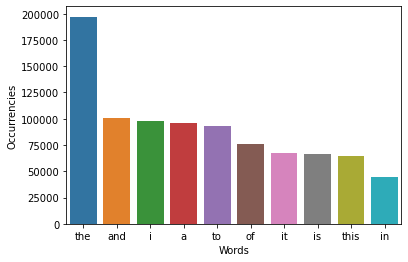

In [6]:
from collections import Counter

mostUsed = pd.Series(' '.join(train['review_text']).lower().split()).value_counts()[:10]
mostUsedGraph = sb.barplot(mostUsed.index, mostUsed.values)
mostUsedGraph.set(xlabel="Words", ylabel="Occurrencies")

### Treating the data
##### Cleanup and Normalization

In [7]:
ps = PorterStemmer()
# It's important to keep negative words in the samples
customStopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "should", "now"]

def normalize(text):
    # remove non alpha chars
    text = re.sub('[^a-zA-Z0-9]', ' ', str(text))
    # to lower-case and tokenize
    text = text.lower().split()
    # stemming and stop word removal (with or without stop words)
    # text = ' '.join([ps.stem(w) for w in text if not w in customStopwords])
    text = ' '.join([ps.stem(w) for w in text])

    return text

train['review_text'] = train['review_text'].apply(normalize)

train['review_title'] = train['review_title'].apply(normalize)
train.head()


test['review_text'] = test['review_text'].apply(normalize)
test['review_title'] = test['review_title'].apply(normalize)

##### Saving Preprocessed data
Since the original dataset is very large, we can sample it and save the preprocessed data in a different csv file, so it can be used later.

In [9]:
def savePreprocessedData(dataSet, fileName):
    dataSet.to_csv(fileName, index=False)

savePreprocessedData(train, './data/train_preprocessed100k_stopWords.csv')
savePreprocessedData(test, './data/test_preprocessed_stopWords.csv')

##### Generating wordclouds
A visually appealing way of observing words in a dataset is by showing wordclouds. In order to make a single wordcloud for a whole column, we can join all the cells together. We then pass it to WordCloud to generate a wordcloud: it will automatically assign weights to words based on the number of occurrences of each word.

These are the most common words in the reviews' titles:

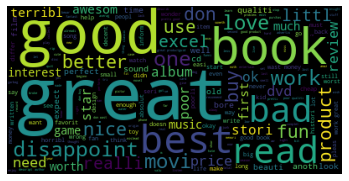

In [8]:
wordcloudTitle = WordCloud().generate(" ".join([str(x) for x in train['review_title'].values]))

plt.figure()
plt.imshow(wordcloudTitle)
plt.axis('off')
plt.show()

These are the most common words in the reviews' text:

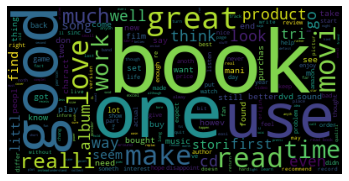

In [9]:
wordcloudText = WordCloud().generate(" ".join([str(x) for x in train['review_text'].values]))

plt.figure()
plt.imshow(wordcloudText)
plt.axis('off')
plt.show()

It would also be interesting to visualize a wordcloud for each of the reviews' classes (1 to 5):

Word cloud for class 1's titles:


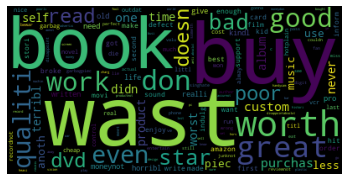

Word cloud for class 1's text:


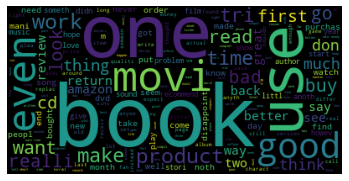

Word cloud for class 2's titles:


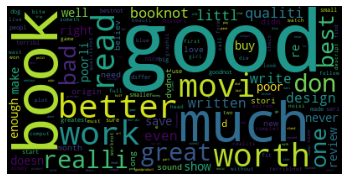

Word cloud for class 2's text:


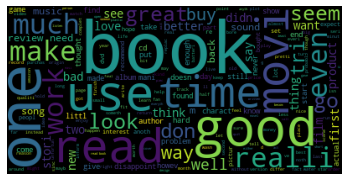

Word cloud for class 3's titles:


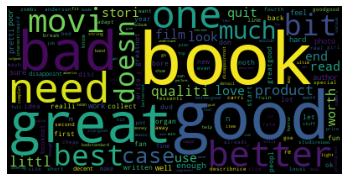

Word cloud for class 3's text:


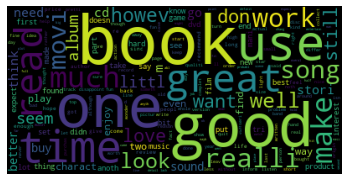

Word cloud for class 4's titles:


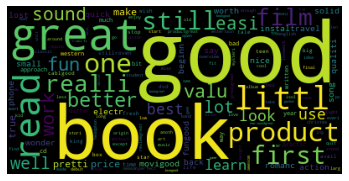

Word cloud for class 4's text:


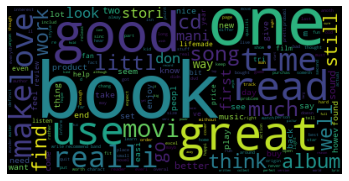

Word cloud for class 5's titles:


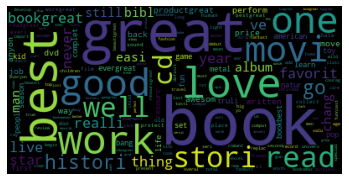

Word cloud for class 5's text:


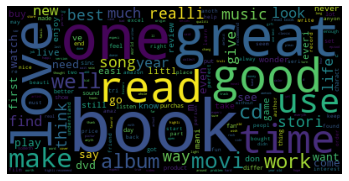

In [10]:
wordsPerClass = {
    1: ("", ""), # title and text
    2: ("", ""),
    3: ("", ""),
    4: ("", ""),
    5: ("", ""),
}

for i in range(len(train)):
    classId = int(train['class_index'].values[i])
    titleWords = train['review_title'].values[i]
    textWords = train['review_text'].values[i]
    
    wordsPerClass[classId] = (wordsPerClass[classId][0] + titleWords, wordsPerClass[classId][1] + textWords)

for i in range(1, 6):
    # Word cloud for class's titles
    wordcloudTitle = WordCloud().generate(wordsPerClass[i][0])
    print(f"Word cloud for class {i}'s titles:")

    plt.figure()
    plt.imshow(wordcloudTitle)
    plt.axis('off')
    plt.show()

    # Word cloud for class's text
    wordcloudText = WordCloud().generate(wordsPerClass[i][1])
    print(f"Word cloud for class {i}'s text:")

    plt.figure()
    plt.imshow(wordcloudText)
    plt.axis('off')
    plt.show()